## Tutorial 2 - Autoencoder Continued Training

In this example, we will demonstrate how a model that has been pretrained can be continued to train with new data. This is useful when you have a model that has been trained on a large dataset, and you want to fine-tune it to a new dataset. BUT, we demonstrate that this is not always a good idea.

In [1]:
import numpy as np

### Load our pretrained model

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### Load our new symbol and test the autoencoder on this new symbol

1/1 [==============================] - 0s 275ms/step
(1, 784)


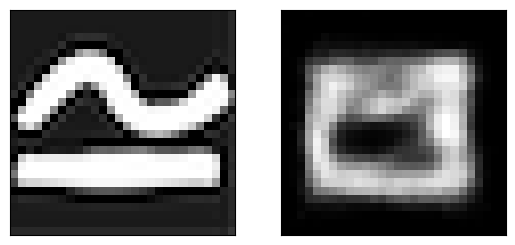

In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can, this autoencoder doesn't do a good job with this new symbol.

### Continue training the pretrained autoencoder with only the new symbol

In [4]:
input_arr = input_arr.reshape(784)

new_images = [input_arr for _ in range(1000)]

new_images = np.array(new_images)
new_images.shape

(1000, 784)

In [5]:
from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = pretrained_model.fit(
    x=new_images, # For autoencoders, both the input and the target are the same
    y=new_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images, new_images),
    callbacks=[early_stop]
)

Epoch 1/10
8/8 [==============================] - 3s 104ms/step - loss: 0.5749 - val_loss: 0.3814
Epoch 2/10
8/8 [==============================] - 0s 45ms/step - loss: 0.3243 - val_loss: 0.2936
Epoch 3/10
8/8 [==============================] - 0s 46ms/step - loss: 0.2875 - val_loss: 0.2835
Epoch 4/10
8/8 [==============================] - 0s 49ms/step - loss: 0.2818 - val_loss: 0.2802
Epoch 5/10
8/8 [==============================] - 0s 46ms/step - loss: 0.2796 - val_loss: 0.2789
Epoch 6/10
8/8 [==============================] - 0s 46ms/step - loss: 0.2787 - val_loss: 0.2783
Epoch 7/10
8/8 [==============================] - 0s 47ms/step - loss: 0.2782 - val_loss: 0.2781
Epoch 8/10
8/8 [==============================] - 0s 47ms/step - loss: 0.2780 - val_loss: 0.2779
Epoch 9/10
8/8 [==============================] - 0s 49ms/step - loss: 0.2779 - val_loss: 0.2779
Epoch 10/10
8/8 [==============================] - 0s 48ms/step - loss: 0.2778 - val_loss: 0.2778


### Explore the performance of the autoencoder on the new symbol

1/1 [==============================] - 0s 44ms/step
(1, 784)


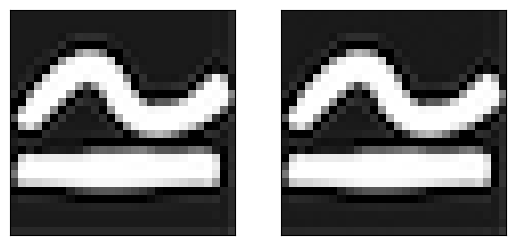

In [6]:
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can see, the updated autoencoder does a much better job with the new symbol!

### Test how our model does on the original 10 digits

Load the original 10 digits dataset and test the autoencoder on them.

In [7]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


313/313 [==============================] - 2s 6ms/step


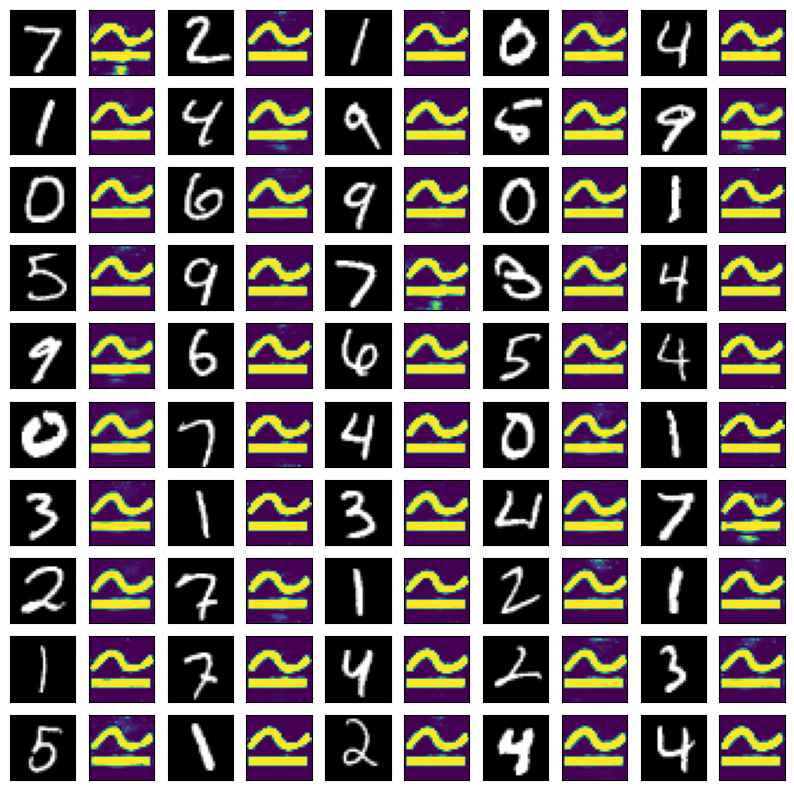

In [8]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

**What happened here!** This is **'catastrohpic forgetting'** -- the model has forgotten how to reconstruct the MNIST digits. This is because the model was trained on the test images, and not the MNIST images. 